In [6]:
# General Functions Import

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Importing Keras
import keras
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential

# Importing a Dataset

# Labeling Data on Circles

n_pts = 500
x, y = datasets.make_circles(n_samples = n_pts, random_state = 100, noise = 0.1, factor = 0.2)
# plt.scatter(x[y==0,0], x[y==0,1])
# plt.scatter(x[y==1,0], x[y==1,1])
# plt.legend(['y=0','y=1'])


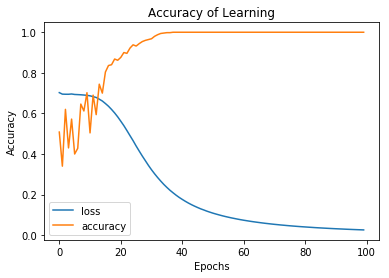

In [7]:
# Initializing the Deep Neural Network

model = Sequential()
model.add(Dense(4, input_shape =(2,), activation = 'sigmoid'))
model.add(Dense(1, activation='sigmoid'))
adam=Adam(lr=0.01)

model.compile(adam, 
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Running the Neural Network

h=model.fit(x=x, 
            y=y,
           verbose=0,
           batch_size=20,
           epochs=100, shuffle='true'
           )

# Plotting the Results

plt.plot(h.history['loss'])
plt.title('Accuracy of Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(h.history['acc'])
plt.legend(['loss','accuracy'])

[[0.92213684]]


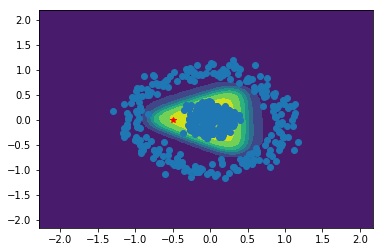

In [3]:
def plot_boundary(data, label, model):
    x_span = np.linspace(min(data[:,0])-1, max(data[:,0])+1)
    y_span = np.linspace(min(data[:,1])-1, max(data[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] 
    pred_fun = model.predict(grid)
    z = pred_fun.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

plot_boundary(x, y, model)

plt.scatter(x[:n_pts,0], x[:n_pts,1])
plt.scatter(x[n_pts:,0], x[n_pts:,1])

x = -0.5
y = 0.0
point = np.array([[x,y]])
predict = model.predict(point)
plt.plot([x],[y], marker ="*",color ='red')
print(predict)
